<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Palindrome_Partitioning_Min_Cuts_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Palindrome Partitioning Min Cuts

Given a non-empty string, write a function that returns the minimum number of cuts needed to perform on the string such that each remaining substring is a palindrome.

A palindrome is defined as a string that's written the same forward as backward. Note that single-character strings are palindromes.

Sample Input

```
string = "noonabbad"
```



Sample Output

```
2 // noon | abba | d"
```



# Solution 1

In [1]:
# Time O(n^3)
# Space O(n^2)

def palindromePartitioningMinCuts(string):
	palindromes = [[False for _ in string] for _ in string]
	for i in range(len(string)):
		for j in range(i, len(string)):
			palindromes[i][j] = is_palindrome(string[i:j + 1])
	cuts = [float('-inf') for _ in string]
	for i in range(len(string)):
		if palindromes[0][i]:
			cuts[i] = 0
		else:
			cuts[i] = cuts[i - 1] + 1
			for j in range(1, i):
				if palindromes[j][i] == True and cuts[j - 1] + 1 < cuts[i]:
					cuts[i] = cuts[j - 1] + 1
	return cuts[-1]

def is_palindrome(string):
	left_idx = 0
	right_idx = len(string) - 1
	while left_idx < right_idx:
		if string[left_idx] != string[right_idx]:
			return False
		left_idx += 1
		right_idx -= 1
	return True

In [2]:
string = "noonabbad"
palindromePartitioningMinCuts(string)
# noon|abba|d

2

In [3]:
string = "noonaabbad"
palindromePartitioningMinCuts(string)
# noon|a|abba|d

3

In [4]:
string = "noonanoond"
palindromePartitioningMinCuts(string)
# noonanoon|d

1

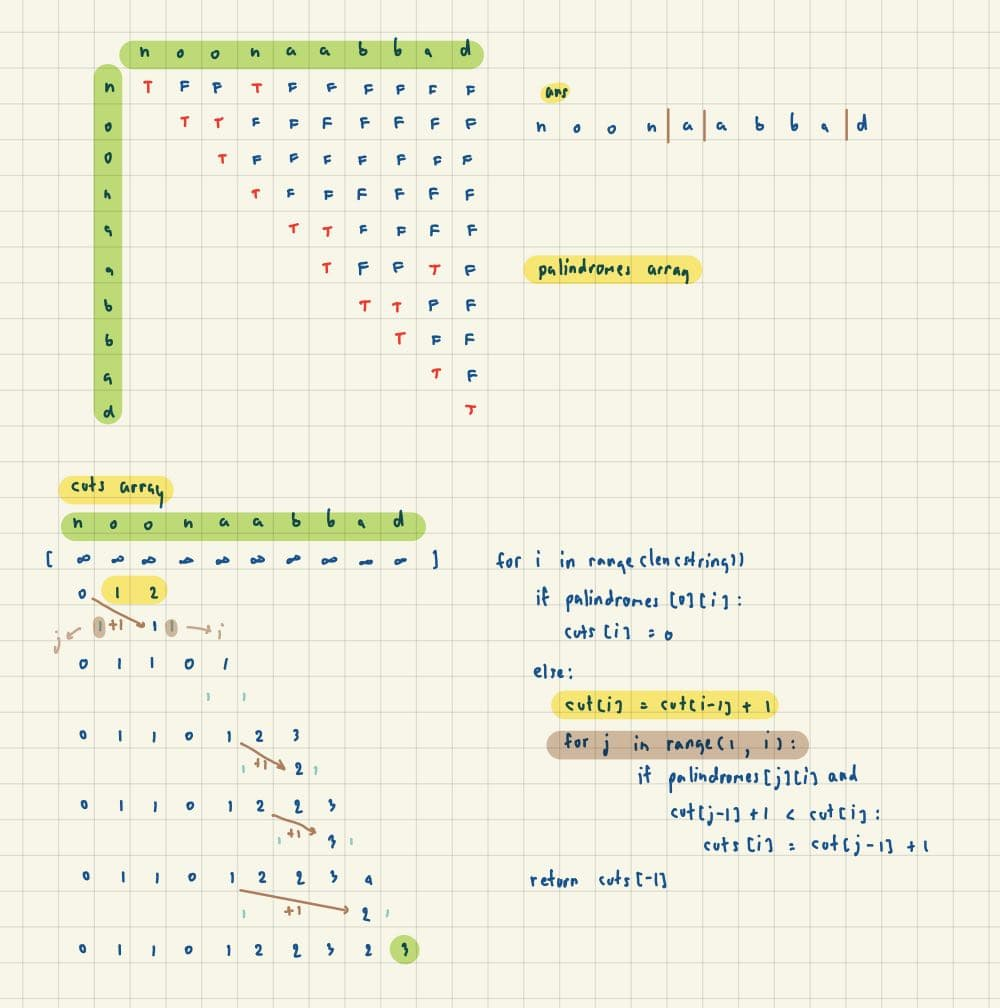

# Solution 2

same as solution 1.

only change the way to traverse on palindromes array. So, we dont need O(n) for external palindrome check function.

We can find anwser from subproblem that we previously solve

In [9]:
def palindromePartitioningMinCuts(string):
  palindromes = [[False for _ in string] for _ in string]
  for length in range(1, len(string) + 1):
    for i in range(len(string) - length + 1):
      j = i + length - 1
      if length <= 2:
        palindromes[i][j] = string[i] == string[j]
      elif length >= 3:
        palindromes[i][j] = string[i] == string[j] and palindromes[i + 1][j - 1]
      
  cuts = [float('-inf') for _ in string]
  for i in range(len(string)):
    if palindromes[0][i]:
      cuts[i] = 0
    else:
      cuts[i] = cuts[i - 1] + 1
      for j in range(1, i):
        if palindromes[j][i] == True and cuts[j - 1] + 1 < cuts[i]:
          cuts[i] = cuts[j - 1] + 1
  return cuts[-1]

In [10]:
string = "noonabbad"
palindromePartitioningMinCuts(string)
# noon|abba|d

2

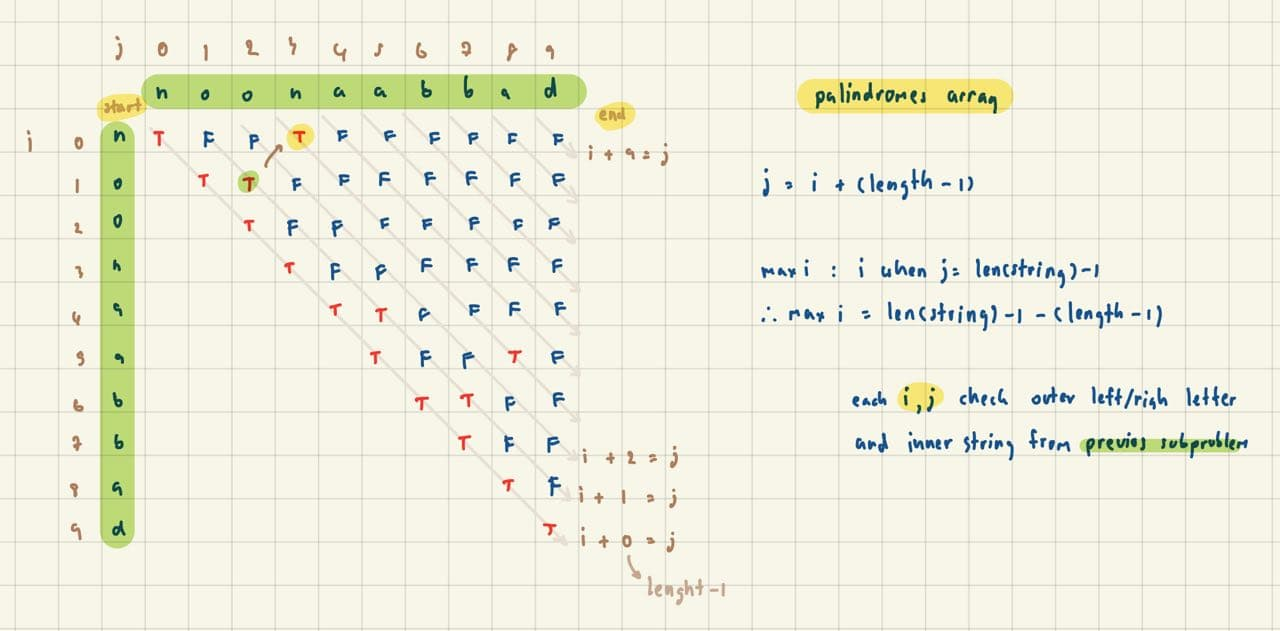